In [1]:
import pyvista as pv
import pyvistaqt as pvqt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PVGeo as PVG
from PVGeo.grids import EsriGridReader
#import PVGeo as PVG

Plotting points extracted from QGIS Map

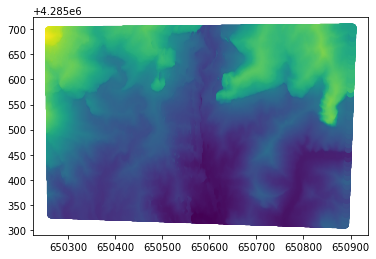

In [38]:
#Points_DEM_Data
dem = pd.read_csv('D:\OneDrive - University of Texas at El Paso\JupyterNotebooks\CSV_Files\DEM_Points.csv')
plt.scatter(dem['X'], dem['Y'], c=dem['Z'])

Plotting input porosity data derived from thin sections

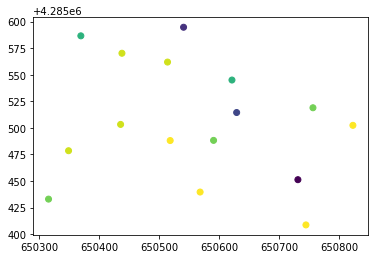

In [39]:
#original data
points = pd.read_csv('D:\OneDrive - University of Texas at El Paso\JupyterNotebooks\CSV_Files\Proj_2_Samples.csv')
plt.scatter(points['X'], points['Y'], c=points['Porosity'])

Convert point data to PVG poly data

In [40]:
#sample data
points=PVG.points_to_poly_data(points)
points

PolyData (0x164c5759280)
  N Cells:	16
  N Points:	16
  X Bounds:	6.503e+05, 6.508e+05
  Y Bounds:	4.285e+06, 4.286e+06
  Z Bounds:	1.612e+03, 1.671e+03
  N Arrays:	1

In [41]:
#DEM points to Pyvista data type
dem=PVG.points_to_poly_data(dem)
dem

PolyData,Information
N Cells,1772390
N Points,1772390
X Bounds,"6.503e+05, 6.509e+05"
Y Bounds,"4.285e+06, 4.286e+06"
Z Bounds,"1.594e+03, 1.753e+03"
N Arrays,0


Create a surface from the topographic data

In [42]:
surf = dem.delaunay_2d()

#Check how long this takes to interpolate to remember

In [43]:
p = pvqt.BackgroundPlotter()
p.add_mesh(surf, cmap='viridis')
p.show()

Interpolate porosity data onto the surface

In [44]:
interpolated = surf.interpolate(points, radius=100, sharpness =4)

interpolated

PolyData (0x164c5769040)
  N Cells:	3543829
  N Points:	1772390
  X Bounds:	6.503e+05, 6.509e+05
  Y Bounds:	4.285e+06, 4.286e+06
  Z Bounds:	1.594e+03, 1.753e+03
  N Arrays:	1

In [45]:
plotter= pvqt.BackgroundPlotter()
#p = pv.Plotter()
plotter.add_mesh(points, point_size=10, render_points_as_spheres=True, cmap = 'viridis')
#plotter.add_point_scalar_labels(points, "Porosity", point_size=20, font_size=36)
plotter.add_mesh(surf, cmap='autumn')
#plotter.add_mesh(points_reflected)
plotter.show()